## DEMO

### Single Image

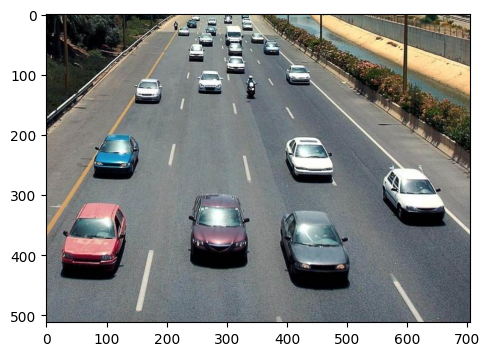

In [10]:
from main import load_data
import matplotlib.pyplot as plt
%matplotlib inline

# Load example data
src_path = './examples/image1'
img, bounding_boxes, class_ids, class_names = load_data(src_path)

# Show image
fig,ax = plt.subplots(figsize=(8,4))
ax.imshow(img)

Distance = 0.00 feet
Bounding Box 2 is RIGHT of Bounding Box 1
Apparent Object Width = [106.80855, 109.63452]
Y location = [435.3367, 347.4341]
Scales = [0.056175279168491125, 0.0547272877079608]
Scales From Image = (0.056169732808903944, 0.0547201367095807)
Distance = 23.92 feet
Bounding Box 2 is RIGHT of Bounding Box 1
Apparent Object Width = [106.80855, 120.43152]
Y location = [435.3367, 446.48755]
Scales = [0.056175279168491125, 0.0498208448420039]
Scales From Image = (0.05636715163914348, 0.050098679935916886)
Distance = 13.57 feet
Bounding Box 2 is RIGHT of Bounding Box 1
Bounding Box 2 is BELOW Bounding Box 1
Apparent Object Width = [106.80855, 42.639282]
Y location = [435.3367, 120.83055]
Scales = [0.056175279168491125, 0.14071531429912884]
Scales From Image = (0.0562657891812252, 0.1409385685023793)
Distance = 40.34 feet
Bounding Box 2 is RIGHT of Bounding Box 1
Bounding Box 2 is BELOW Bounding Box 1
Apparent Object Width = [106.80855, 85.51105]
Y location = [435.3367, 281.686

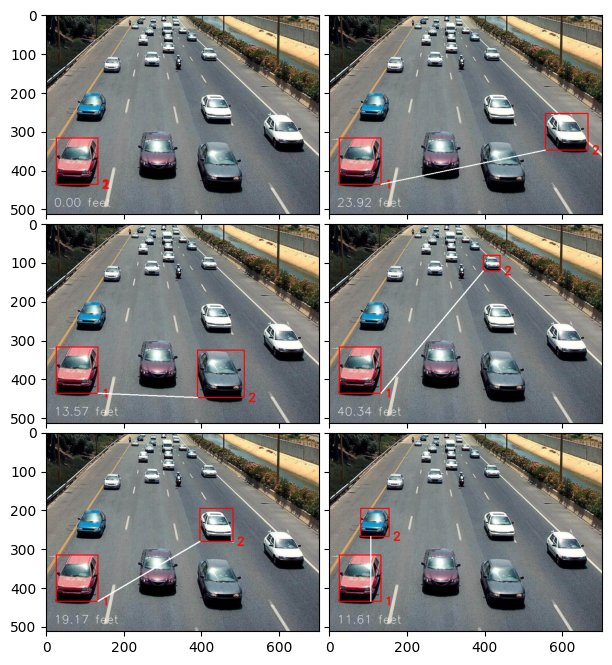

In [11]:
from BboxDistances.draw_bbox_pair_distance import draw_bbox_pair_distance
from mpl_toolkits.axes_grid1 import ImageGrid

# Set object size
width1 = 6
width2 = 6
units = 'feet'

# Test on multiple objects
# List for storing annotated images
imgs = []

# Test on first 6 objects
for idx in range(0,6):
    imgs.append( 
        draw_bbox_pair_distance(
            img, 
            bounding_boxes[0,:], 
            bounding_boxes[idx,:],
            width1=width1, 
            width2=width2,
            units=units, 
            verbose=True))

# Show images
fig = plt.figure(figsize=(12., 8.))
grid = ImageGrid(fig, 111, 
        nrows_ncols=(3, 2),
        axes_pad=0.1,
        )
for ax, im in zip(grid, imgs):
    ax.imshow(im)

## Video

In [12]:
# Imports
from BboxDistances.bbox_distances_multiframe import bbox_distances_multiframe
from BboxDistances.utils import read_video, save_video
import numpy as np
import os

# Set object size
width1 = 6
width2 = 6
units = 'feet'

# Read video
src_path = './examples/video2'
imgs = read_video( os.path.join(src_path,'movie.mp4'))

# Read Bounding Boxes
with open(os.path.join(src_path,'bounding_boxes.npy'),'rb') as f:
    boxes = np.load(f)

In [13]:
# Measure distances, annotate, and save video
img_annot = []
for frame in range(len(imgs)):
    img_annotated = draw_bbox_pair_distance(
        imgs[frame], 
        boxes[0,:,frame],
        boxes[1,:,frame],
        width1=6,
        width2=6,
        units='feet'
    )
    img_annot.append( img_annotated)

save_video(img_annot,os.path.join(src_path,'movie_annotated.mp4'))

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


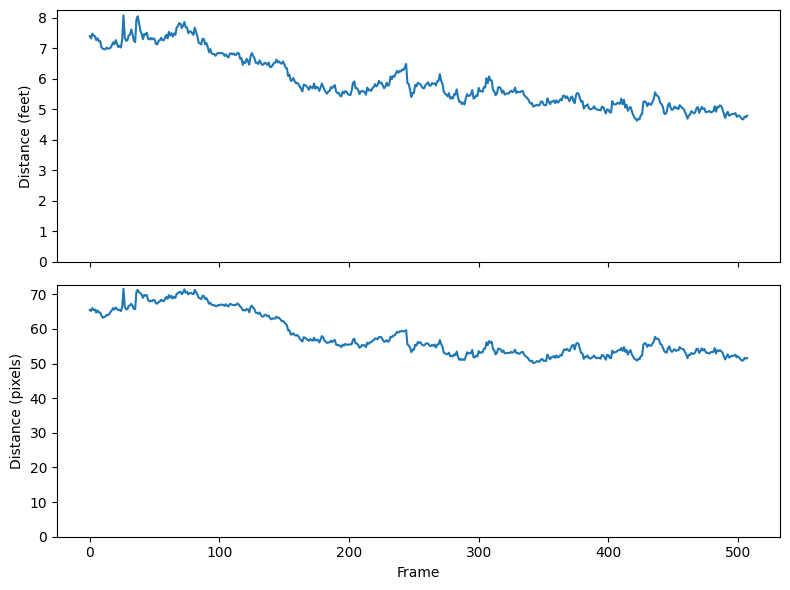

In [14]:
# Plot distance vs time
from BboxDistances.bbox_distances_multiframe import bbox_distances_multiframe

# Create distance plot
dmat_real = bbox_distances_multiframe(boxes, imgs[0].shape[:2], widths=np.array([width1,width2]), units='feet')
dmat_pix = bbox_distances_multiframe(boxes, imgs[0].shape[:2], widths=np.array([width1,width2]), units='pixels')
fig,ax = plt.subplots(2,1, figsize=(8,6),sharex=True)

ax[0].plot(dmat_real[0,1,:])
ax[0].set_ylabel('Distance (feet)')
ax[0].set_ylim(bottom=0)

# make a plot with different y-axis using second axis object
ax[1].plot(dmat_pix[0,1,:])
ax[1].set_ylabel('Distance (pixels)')
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('Frame')

plt.tight_layout()